In [103]:
cd/Users/choejuhui/Desktop/jupyter/Rhythm-of-Chika-data/Datasets

/Users/choejuhui/Desktop/jupyter/Rhythm-of-Chika-data/Datasets


## 랜드마크 1개에 대한 x,y,z의 가속도

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [195]:
#50번부터 350번까지의 프레임만 갖고 오기
pos_1 = np.load('Left_ULF_p_5.npy')[50:350]
pos_1.shape
#pos_1 = pos_1[:,:,2]

(300, 21, 3)

In [196]:
pos_z = pd.DataFrame(pos_1[:,:,2])
pos_z

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.526314,0.478252,0.481889,0.454453,0.429456,0.409672,0.435209,0.660961,0.591112,0.662409,...,0.670256,0.686452,0.741459,0.004462,0.007699,-0.000529,0.009748,0.007024,0.002039,0.006003
1,0.519931,0.473381,0.473327,0.445232,0.421052,0.403184,0.426041,0.652522,0.581454,0.657778,...,0.663375,0.676574,0.734526,0.000430,0.003619,-0.006075,0.005896,0.004479,-0.001184,0.006165
2,0.518518,0.473318,0.476539,0.449014,0.423062,0.401629,0.424835,0.644903,0.573173,0.649194,...,0.654348,0.668453,0.724541,0.001084,0.001765,-0.006635,0.004624,0.003910,-0.002203,0.006340
3,0.517831,0.474634,0.475970,0.450263,0.424486,0.402236,0.425308,0.643768,0.571846,0.648064,...,0.650921,0.664469,0.719741,0.002475,0.002529,-0.005546,0.004195,0.003255,-0.003053,0.005592
4,0.520961,0.480361,0.474855,0.447198,0.424564,0.411510,0.430025,0.653610,0.578467,0.654504,...,0.651810,0.664145,0.729724,0.010395,0.009075,0.002858,0.008344,0.005510,-0.000067,0.001643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.552319,0.526206,0.516504,0.488416,0.468667,0.458074,0.473877,0.644046,0.582655,0.655411,...,0.655279,0.671968,0.738855,0.015363,0.011381,-0.000143,0.007473,0.003322,-0.004096,-0.000338
296,0.548635,0.523425,0.516347,0.486665,0.466089,0.455610,0.468671,0.640147,0.574066,0.651855,...,0.646433,0.660472,0.726233,0.013887,0.012015,-0.001670,0.008154,0.004034,-0.003164,-0.001212
297,0.549693,0.525996,0.511789,0.481575,0.462214,0.459274,0.470377,0.636186,0.562966,0.641039,...,0.636143,0.652246,0.721228,0.014669,0.015244,0.001680,0.009500,0.005156,-0.002361,0.001882
298,0.548829,0.533386,0.503831,0.479980,0.464332,0.472779,0.474101,0.634211,0.562355,0.633622,...,0.629749,0.644978,0.714125,0.011781,0.011516,0.000924,0.007080,0.003061,-0.005956,-0.001052


In [197]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler().fit_transform(pos_z)

In [198]:
minmax_df_z = pd.DataFrame(minmax_scaler)
df_z = np.array(minmax_df_z)

In [201]:
final = np.concatenate([pos_1[:,:,:2], df_z])

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)

In [153]:
#acceleration => numpy array 구하기
velocity = np.zeros((1,21,3))
acceleration = np.zeros((1,21,3))


for i in range(len(pos_1)-1):
    current_velocity = pos_1[i+1] - pos_1[i]
    velocity = np.vstack((velocity, current_velocity.reshape(1,21,3)))

velocity = velocity[1:]

for i in range(len(velocity)-1):
    current_acceleration = velocity[i+1] - velocity[i]
    acceleration = np.vstack((acceleration, current_acceleration.reshape(1,21,3)))

acceleration = acceleration[1:]

# acc_1_df => pd.DataFrame
# 이상치의 index 추출
acc_1_df = pd.DataFrame(acceleration[:,4,:], columns=['x','y','z']) # <= 여기서 랜드마크 번호 수정
idx_list=[]
axis = ['x','y','z']
for i in axis:
    q3=acc_1_df['%s' % (i)].quantile(0.75)
    q1=acc_1_df['%s' % (i)].quantile(0.25)
    iqr=q3-q1
    outlier_top=q3+1.5*iqr
    outlier_bottom=q1-1.5*iqr

    idx=acc_1_df[(acc_1_df['%s' % (i)]<outlier_bottom) | (acc_1_df['%s' % (i)]>outlier_top)].index
    for i in idx:
        idx_list.append(str(i))
    idx_list.append('end')

# x,y,z를 구분하는 'end' string 때문에 전처리 진행
idx_string = ' '.join(idx_list)
idx_string_split = idx_string.split('end')
x_outlier_str = idx_string_split[0].strip()
y_outlier_str = idx_string_split[1].strip()
z_outlier_str = idx_string_split[2].strip()

# 문자열에서 int로 된 이상치 인덱스 리스트로 변환
x_outlier = list(map(int, x_outlier_str.split(' ')[:-1]))
y_outlier = list(map(int, y_outlier_str.split(' ')[:-1]))
z_outlier = list(map(int, z_outlier_str.split(' ')[:-1]))
 
# 양 옆에 있는 값의 평균으로 대체
acc_1_parsed = acceleration[:,4,:]
for i in range(len(pos_1)-1):
    if i in x_outlier:
        acc_1_parsed[i][0] = (acc_1_parsed[i-1][0] + acc_1_parsed[i+1][0])/2 
    if i in y_outlier:
        acc_1_parsed[i][1] = (acc_1_parsed[i-1][1] + acc_1_parsed[i+1][1])/2 
    if i in z_outlier:
        acc_1_parsed[i][2] = (acc_1_parsed[i-1][2] + acc_1_parsed[i+1][2])/2 
        
final_df = pd.DataFrame(acc_1_parsed, columns = ['x','y','z'])
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler().fit_transform(final_df)
acc_df = pd.DataFrame(standard_scaler, columns = ['x','y','z'])

<AxesSubplot:>

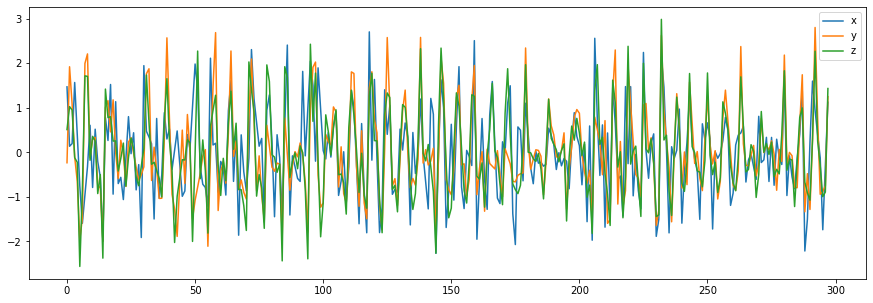

In [154]:
acc_df.plot(figsize = (15,5))

<AxesSubplot:>

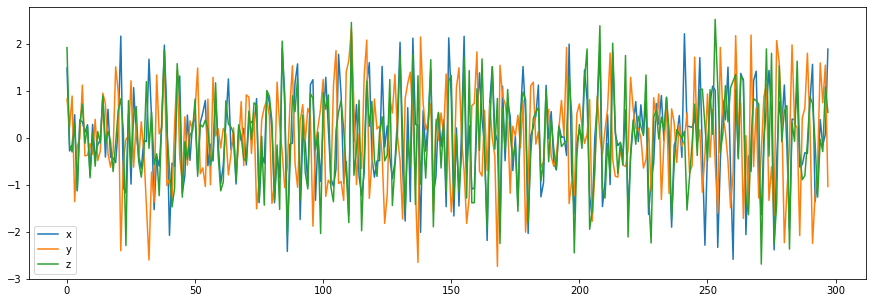

In [150]:
acc_df.plot(figsize = (15,5))

## position을 acceleration 넘파이 배열로 바꿔 저장하기

In [117]:
hand="Left" 
gesture_list = ['URF','UMF','ULF','DLF','DMF','DRF','URB','UMB','ULB','DLB','DMB','DRB','URO','ULO','DLO','DRO']
session = 5
#os.makedirs('Datasets_acc/', exist_ok=True)

In [118]:
for gesture in gesture_list:
    position = np.load('%s_%s_p_%d.npy' % (hand, gesture, session))
    velocity = np.zeros((1,21,3))
    acceleration = np.zeros((1,21,3))
    
    for i in range(len(position)-1):
        current_velocity = position[i+1] - position[i]
        velocity = np.vstack((velocity, current_velocity.reshape(1,21,3)))
    
    velocity = velocity[1:]
    
    for i in range(len(velocity)-1):
        current_acceleration = velocity[i+1] - velocity[i]
        acceleration = np.vstack((acceleration, current_acceleration.reshape(1,21,3)))

    acceleration = acceleration[1:]
    
    np.save('Datasets_acc/%s_%s_a_%d' % (hand,gesture, session),acceleration)

In [ ]:
#acceleration => numpy array 구하기
velocity = np.zeros((1,21,3))
acceleration = np.zeros((1,21,3))

for i in range(len(pos_1)-1):
    current_velocity = pos_1[i+1] - pos_1[i]
    velocity = np.vstack((velocity, current_velocity.reshape(1,21,3)))

velocity = velocity[1:]

for i in range(len(velocity)-1):
    current_acceleration = velocity[i+1] - velocity[i]
    acceleration = np.vstack((acceleration, current_acceleration.reshape(1,21,3)))

acceleration = acceleration[1:]

np.save('Datasets/%s_%s_a_%d' % (hand, gesture, session),acceleration)
